In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('testset.csv.txt')
df.head(10)

,Unnamed: 0,iduser,mdutype,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,...,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
0,0,10100018739106,NaN,sdu,12.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,6.0,12.0,0.0,0.0,3504812.0,0.0,0.0,3504812.0
1,1,10100037810674,NaN,sdu,23.0,0.0,0.0,1.0,0.0,13.0,...,0.0,0.0,8.0,23.0,0.0,0.0,17123098.0,0.0,0.0,17123098.0
2,2,10100036273719,NaN,sdu,4.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,4.0,4.0,0.0,0.0,2234363.0,0.0,0.0,2234363.0
3,3,10100027752244,NaN,sdu,6.0,0.0,1.0,0.0,0.0,NaN,...,NaN,NaN,5.0,6.0,2.0,0.0,602361.0,210114.0,0.0,812475.0
4,4,10100000624840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,10100006151000,NaN,sdu,33.0,0.0,0.0,0.0,0.0,16.0,...,0.0,0.0,18.0,33.0,0.0,0.0,4307703.0,0.0,0.0,4307703.0
6,6,10100036301327,NaN,sdu,25.0,0.0,0.0,0.0,0.0,15.0,...,0.0,0.0,10.0,25.0,0.0,0.0,31817616.0,0.0,0.0,31817616.0
7,7,10100038731798,NaN,sdu,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,10100039037854,NaN,sdu,4.0,0.0,0.0,4.0,0.0,NaN,...,NaN,NaN,15.0,4.0,0.0,0.0,191940.0,0.0,0.0,191940.0
9,9,10100038701419,mul,mdu,27.0,34.0,0.0,2.0,0.0,NaN,...,NaN,NaN,26.0,27.0,35.0,0.0,4229688.0,208649.0,0.0,4438337.0


In [3]:
df_ = df.drop(['iduser', 'mdutype', 'group'], axis = 1)

In [4]:
scaler = [preprocessing.StandardScaler() for i in df_.columns] #평균이 0과 표준편차가 1이 되도록 변환.

In [5]:
def std_based_outlier(df):
    s = set()
    for colname in df.columns:
        outlier = np.abs(df[colname][df[colname].notnull()] - df[colname])
        s.update(outlier[outlier==True].index.tolist())
        
    df = df.iloc[list(set(range(len(df))).difference(s))]
    return df

def outliers_iq(ys):
    quartile_1, quartile_3 = np.nanpercentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

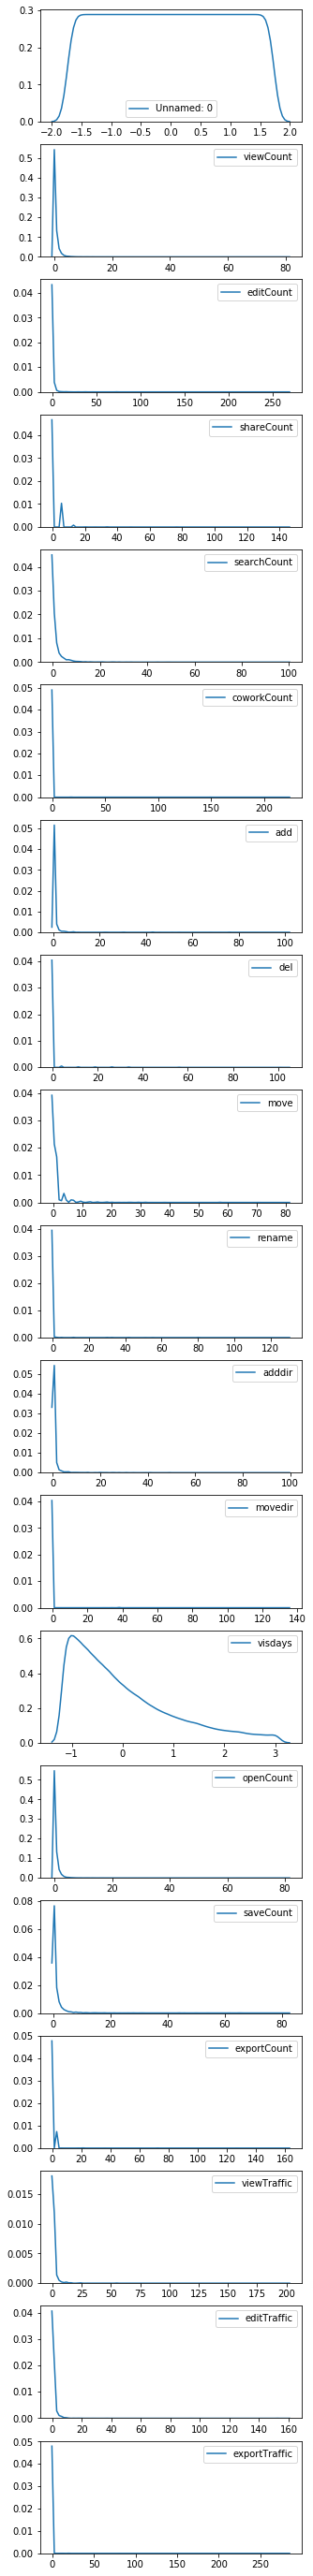

In [6]:
_, axes = plt.subplots(19, 1, figsize=(5, 50))

for i, ax in enumerate(axes):
    colname = df_.columns[i]
    col = df_[colname][df_[colname].notnull()]
    col = col.values.reshape(col.shape[0], 1)
    scaler[i].fit(col)
    sns.kdeplot(scaler[i].transform(col).reshape(-1), ax=ax, label=colname)

In [8]:
# df_ = std_based_outlier(df_)
# df_.info()
df_ = outliers_iq(df_)
# df_.info()

AttributeError: 'tuple' object has no attribute 'columns'

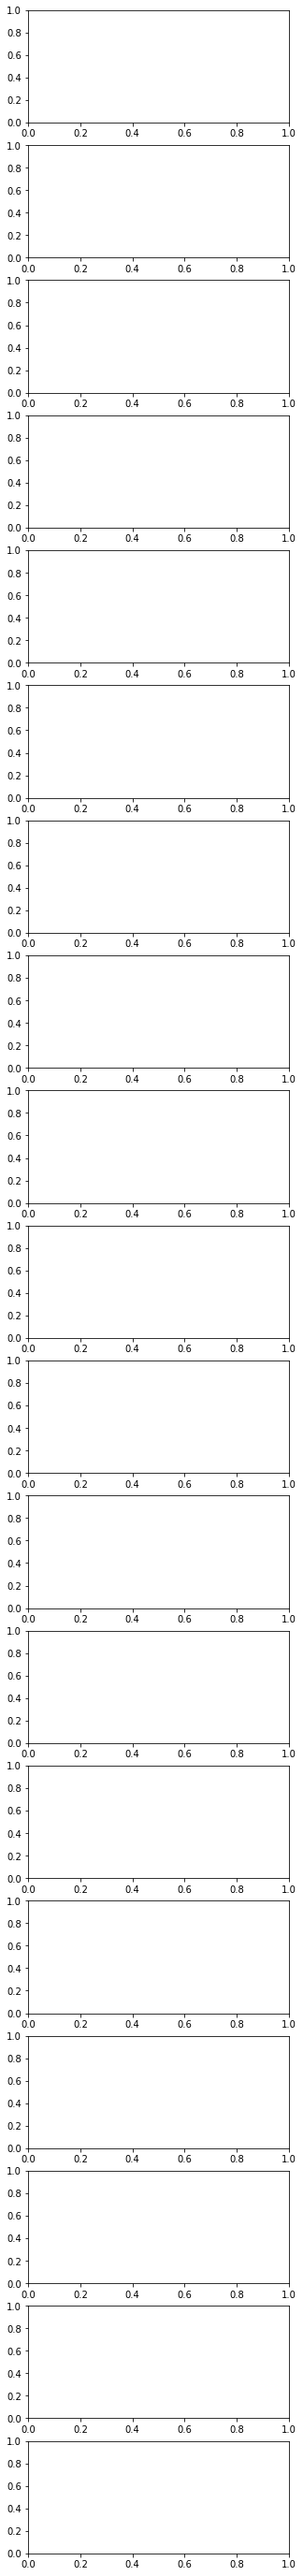

In [9]:
_, axes = plt.subplots(19, 1, figsize=(5, 50))

for i, ax in enumerate(axes):
    colname = df_.columns[i]
    col = df_[colname][df_[colname].notnull()]
    col = col.values.reshape(col.shape[0], 1)
    scaler[i].fit(col)
    sns.kdeplot(scaler[i].transform(col).reshape(-1), ax=ax, label=colname)
#     plt.boxplot(scaler[i].transform(col).reshape(-1), labels=colname)